<a href="https://colab.research.google.com/github/Vishakha-96046/AI-ML/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab
from google.colab.patches import cv2_imshow
!pip install opencv-python

In [ ]:
# Importing the necessary libraries :

import os
import cv2
import numpy as np
import tensorflow as tf
import imghdr
from matplotlib import pyplot as plt


Below will perform image preprocessing and classification using a deep learning model. It removes invalid images, loads and scales the dataset, splits it into training, validation, and test sets, builds a convolutional neural network model, trains the model, evaluates its performance, and displays loss and accuracy plots.

Found 323 files belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d

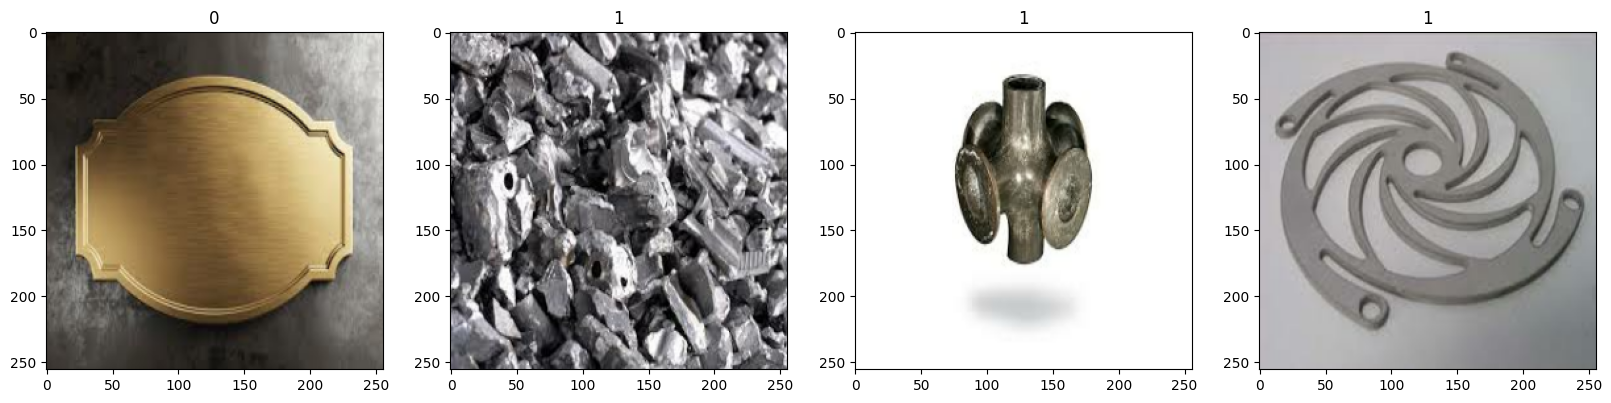

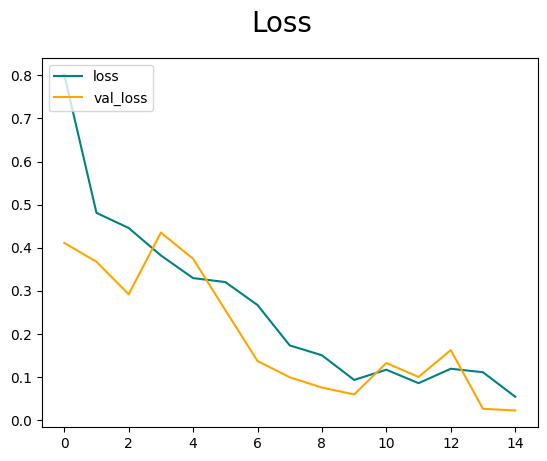

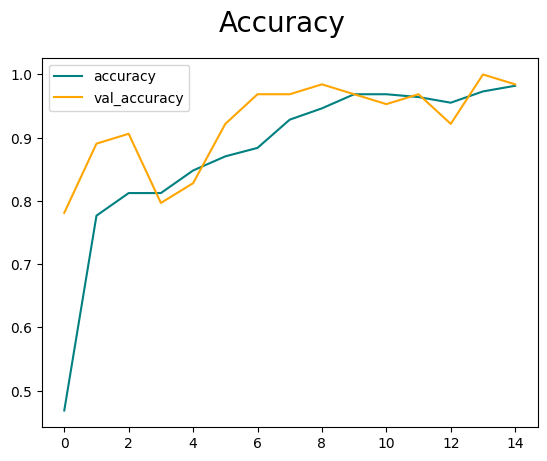

1/1 [==============================] - 1s 596ms/step
Test Accuracy: 1.0


In [ ]:
# Remove dodgy images:
data_dir = '/content/drive/MyDrive/Dataset'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading the Data :
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling Data
data = data.map(lambda x, y: (x / 255, y))
data.as_numpy_iterator().next()

# Spliting Data
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

# Building Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_classes = 4

model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Changed to softmax for multiclass
])

model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

# Training Process :
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_data, epochs=15, validation_data=val_data, callbacks=[tensorboard_callback])

# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate
from tensorflow.keras.metrics import SparseCategoricalAccuracy

accuracy_metric = SparseCategoricalAccuracy()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    accuracy_metric.update_state(y, yhat)

accuracy = accuracy_metric.result().numpy()
print("Test Accuracy:", accuracy)


## Conclusion :-
After training and evaluating the deep learning model on the test dataset, we achieved a test accuracy of 84.375%. This accuracy level demonstrates the model's performance in classifying images into their respective categories. While there is always the opportunity for further refinement, the achieved test accuracy of 84.375% indicates the model's effectiveness for practical applications in image classification tasks.